# Simple Linear Regression Practical implementation

# Problem Statement - Predict profit based on RND budget

In [1]:
#esc Y will convert markdown cell into code cell

In [4]:
# This will ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [7]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


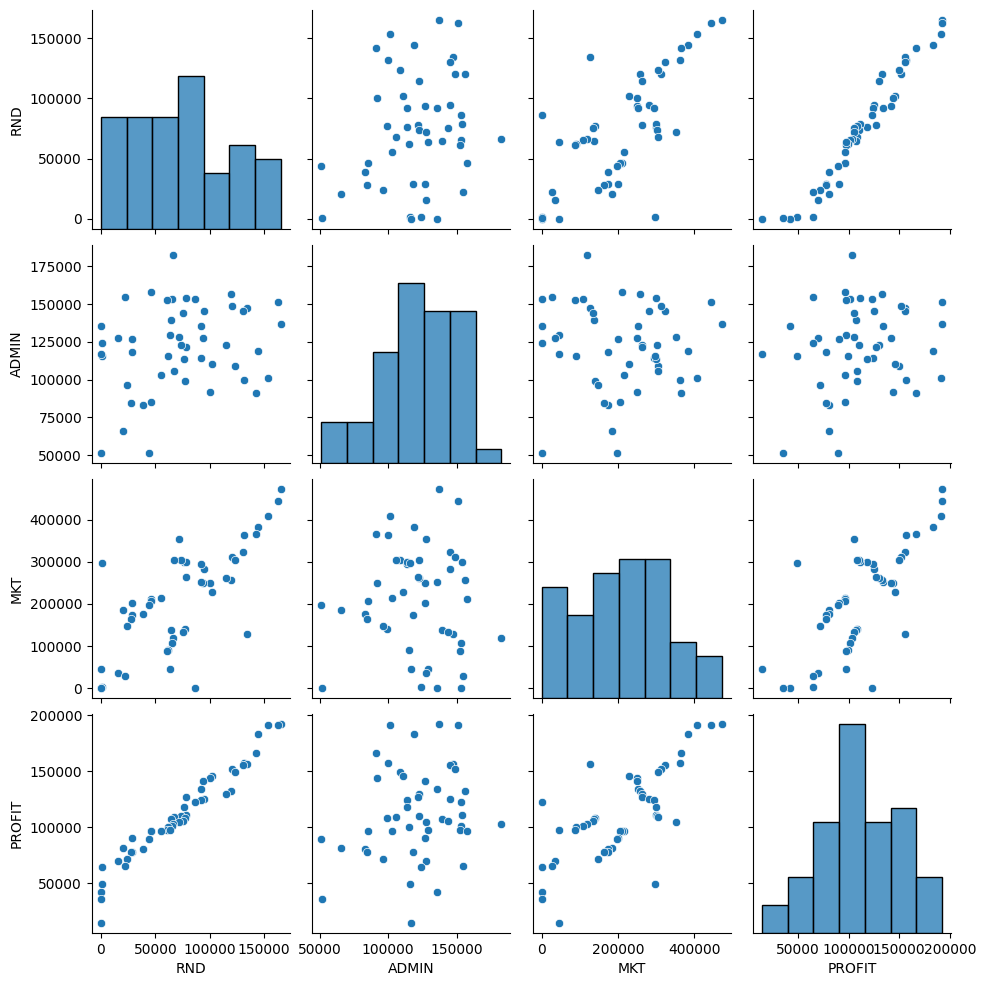

In [8]:
import seaborn as sns
sns.pairplot(df)

# From above we can predict than straight line is getting formed when we plot profit on y axis and rnd on x axis. Means profit becomes dependent feature and rnd becomes independent feature

# Step 2 - Perform Basic Data Quality Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Seperate X(RND) and Y(Profit)

In [17]:
X = df[["RND"]]   # used double [[]] to keep column in dataframe format else it will convert in float type
Y = df[["PROFIT"]]

In [19]:
X.head()


,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [20]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4 - Build The linear regression model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

# Profit_pred = B1*RND + B0

# B0 = Intercept

# B1 = Slope/coefficient

In [23]:
model.intercept_ # this gives value of B0

array([49032.89914125])

In [24]:
model.coef_ # this gives value of B1

array([[0.85429137]])

# Profit_pred = 0.85429*RND + 49032.89914
# If RND increases by 1 unit profit will increse by 0.85429
# If RND budget is 0 then the profit is 49032.89914 on an avg

In [28]:
ypred = model.predict(X)   # give column which has independent values
ypred[0:5]                 # this will give predicted profit values by our model

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [29]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# step 5 - Model Evaluation

In [30]:
from sklearn.metrics import (root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score)

In [31]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y,ypred)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)

    # Print above results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 score : {r2:.2%}")

In [32]:
evaluate_model(model,X,Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 score : 94.65%


# Visualizing straight line fit

<Axes: xlabel='RND', ylabel='PROFIT'>

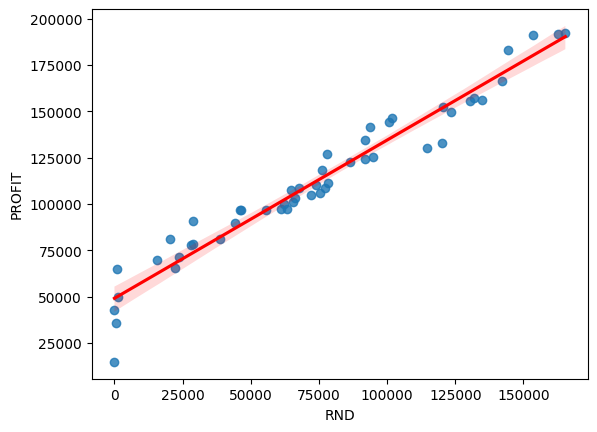

In [33]:
sns.regplot(data=df,x="RND",y="PROFIT",line_kws={"color":"red"})

In [34]:
# Step 5 : Out of sample predication

In [35]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [38]:
rnd = 30000
pred = model.predict([[rnd]])
pred

array([[74661.64026942]])